In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('https://raw.githubusercontent.com/Adithya-Suresh/diabetics/master/diabetes.csv')
#data=data.values.reshape(-1,9)
dt=pd.DataFrame(data)
#dt.columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
print(dt.head(10))

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1
5            5      116             74  ...                     0.201   30        0
6            3       78             50  ...                     0.248   26        1
7           10      115              0  ...                     0.134   29        0
8            2      197             70  ...                     0.158   53        1
9            8      125             96  ...                     0.232   54        1

[10 rows x 9 columns]


In [2]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


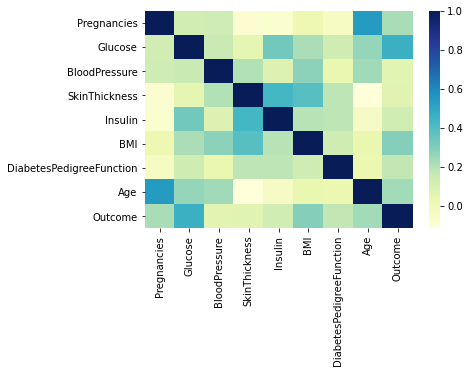

In [3]:
print(dt.describe())
sns.heatmap(dt.corr(),cmap='YlGnBu')

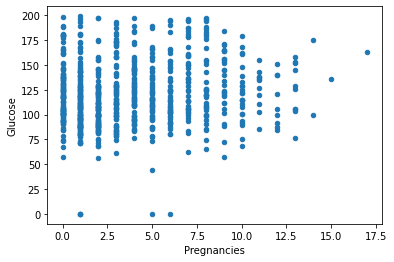

In [4]:
dt.plot.scatter(x='Pregnancies',y='Glucose')

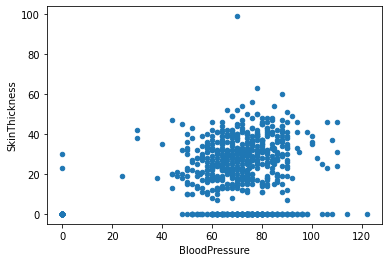

In [5]:
dt.plot.scatter(x='BloodPressure',y='SkinThickness')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               543 non-null    int64  
 1   Glucose                   543 non-null    int64  
 2   BloodPressure             543 non-null    int64  
 3   SkinThickness             543 non-null    int64  
 4   Insulin                   543 non-null    int64  
 5   BMI                       543 non-null    float64
 6   DiabetesPedigreeFunction  543 non-null    float64
 7   Age                       543 non-null    int64  
 8   Outcome                   543 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.4 KB
None


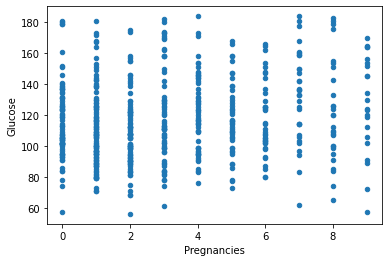

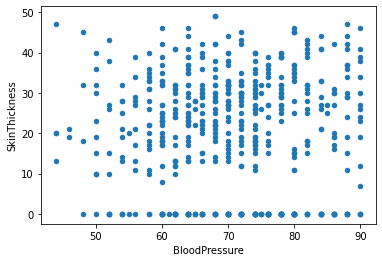

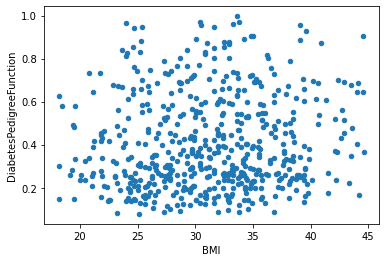

In [56]:
dt=dt.drop(dt.index[dt.Pregnancies>=11.5],axis=0)
dt=dt.drop(dt.index[dt.Glucose>=185],axis=0)
dt=dt.drop(dt.index[dt.BloodPressure>=92],axis=0)
dt=dt.drop(dt.index[dt.BloodPressure<=37],axis=0)
dt=dt.drop(dt.index[dt.BMI>=45],axis=0)
dt=dt.drop(dt.index[dt.DiabetesPedigreeFunction>=1.2],axis=0)
dt.plot.scatter(x='Pregnancies',y='Glucose')
dt.plot.scatter(x='BloodPressure',y='SkinThickness')
dt.plot.scatter(x='BMI',y='DiabetesPedigreeFunction')
print(dt.info())

In [57]:
#h={'Outcome':{1:'Yes',0:'No'}}
#dt=dt.replace(h)
print(dt.head(10))
#dt['Outcome']=pd.to_numeric(dt['Outcome'],downcast='integer')
X=pd.DataFrame(dt)
X=X.drop(['Outcome'],axis=1)
y=dt['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

    Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0             6      148             72  ...                     0.627   50        1
1             1       85             66  ...                     0.351   31        0
2             8      183             64  ...                     0.672   32        1
3             1       89             66  ...                     0.167   21        0
5             5      116             74  ...                     0.201   30        0
6             3       78             50  ...                     0.248   26        1
14            5      166             72  ...                     0.587   51        1
17            7      107             74  ...                     0.254   31        1
19            1      115             70  ...                     0.529   32        1
20            3      126             88  ...                     0.704   27        0

[10 rows x 9 columns]


In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10)
classifier.fit(X_train,y_train)
y_p=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print("Accuracy using Logistic Regresssion: %f"%acc)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train,y_train)
y_p=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print("Accuracy using Decision Tree Classifier: %f"%acc)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_p=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print("Accuracy using Random Forest Classifier: %f"%acc)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)
y_p=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print("Accuracy using KNeighbors Classifiers: %f"%acc)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_p=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_p)
print("Accuracy using GaussianNB Classifiers: %f"%acc)

Accuracy using Logistic Regresssion: 0.733945
Accuracy using Decision Tree Classifier: 0.770642
Accuracy using Random Forest Classifier: 0.779817
Accuracy using KNeighbors Classifiers: 0.706422
Accuracy using GaussianNB Classifiers: 0.798165


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_p)
print(y_test,y_p)
labels =['Pr 0', 'Pr 1']
print(*labels)
for line in cm:
  print(*line)

560    1
138    0
647    1
576    0
757    1
      ..
684    0
144    0
390    0
151    0
538    0
Name: Outcome, Length: 115, dtype: int64 [0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 1]
Pr 0 Pr 1
66 16
11 22


In [28]:
#print(X_train,y_train)
classifier.predict_proba([[3,78,50,32,88,31.0,0.248,26]])


array([[0.98922355, 0.01077645]])